# 01_ATBI
## Modern File Formats


### Metadata

In [3]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from pathlib import Path

base_dir = Path.joinpath(Path.cwd(), "ATBI_01_Suppl")
data_dir = Path.joinpath(base_dir, "data/")
images_dir = Path.joinpath(base_dir, "images/")

In [19]:
# Filenames
fasta = "ABL_GENE.fa"
fastq = "single_end.fastq"
sam = "sam_file.sam"
vcf_file = "ALL.chrY.genome_strip_hq.20101123.svs.low_coverage.genotypes.vcf"

In [20]:
# Other
ref = "CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGGGAGGTGTACGAGGGCGTGTGGAAGAAATACAGCCTGACGGTGGCCGTGAAGACCTTGAAGGAGGACACCATGGAGGTGGAAGAGTTCTTGAAAGAAGCTGCAGTCATGAAAGAGATCAAACACCCTAACCTGGTGCAGCTCCTTGGGGTCTGCACCCGGGAGCCCCCGTTCTATATCATCACTGAGTTCATGACCTACGGGAACCTCCTGGACTACCTGAGGGAGTGCAACCGGCAGGAGGTGAACGCCGTGGTGCTGCTGTACATGGCCACTCAGATCTCGTCAGCCATGGAGTACCTGGAGAAGAAAAACTTCATCCACAGAGATCTTGCTGCCCGAAACTGCCTGGTAGGGGAGAACCACTTGGTGAAGGTAGCTGATTTTGGCCTGAGCAGGTTGATGACAGGGGACACCTACACAGCCCATGCTGGAGCCAAGTTCCCCATCAAATGGACTGCACCC"

### 1. FASTA

In [21]:
from Bio import SeqIO, Seq

# read FASTA file
fasta_sequences = SeqIO.parse(Path.joinpath(data_dir, fasta), "fasta")


In [23]:
for fasta in fasta_sequences:
    name, sequence = fasta.id, fasta.seq


In [31]:
# store as DNA
dna = Seq.Seq(str(sequence))
dna

Seq('ATGTTGGAGATCTGCCTGAAGCTGGTGGGCTGCAAATCCAAGAAGGGGCTGTCC...TAG')

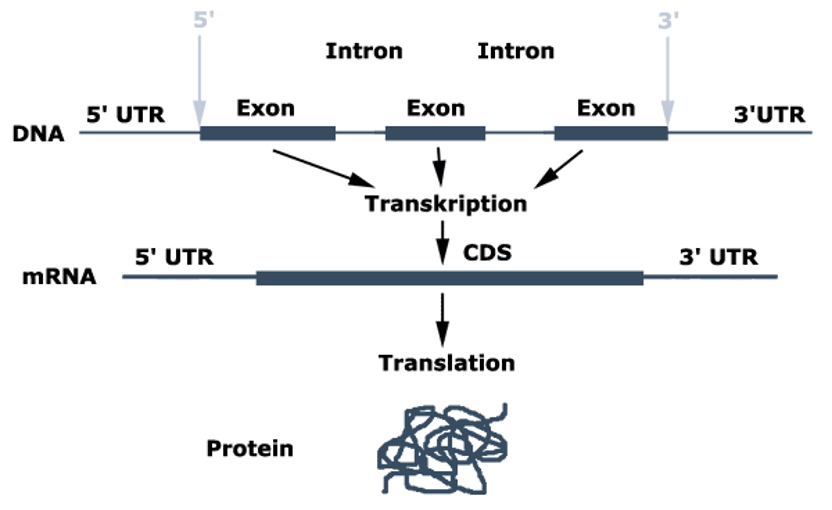

In [27]:
# Reminder:
from IPython.display import Image, display

display(Image(Path.joinpath(images_dir, "ProteinBiosynthesis.png")))

In [30]:
# transcribe into RNA
rna = dna.transcribe()
rna


Seq('AUGUUGGAGAUCUGCCUGAAGCUGGUGGGCUGCAAAUCCAAGAAGGGGCUGUCC...UAG')

In [34]:
# translate into amino acid sequence
amino_acids = rna.translate()
amino_acids

Seq('MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAARWNSKENL...QR*')

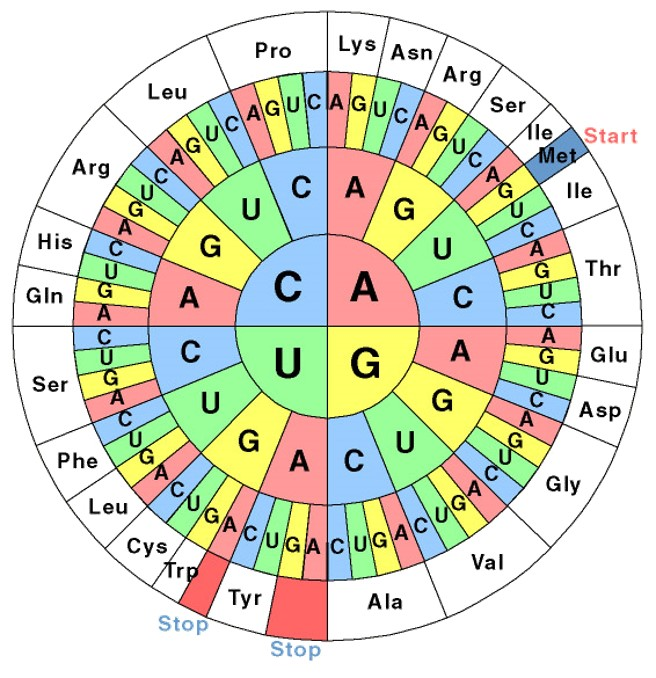

In [33]:
# Reminder: Genetic Code

display(Image(Path.joinpath(images_dir, "GeneticCode.jpg")))

### 2. FASTQ

In [40]:
# read FASTQ file
fastq_sequences = SeqIO.parse(Path.joinpath(data_dir, fastq), "fastq")
first_sequence = next(fastq_sequences)
fq_id = first_sequence.id
fq_seq = first_sequence.seq
fq_phred = first_sequence.letter_annotations["phred_quality"]


In [42]:
# print sequence information
print(f'ID: {fq_id}')
print(f'Sequence: {fq_seq}')
print(f'Phred: {fq_phred}')

ID: M01351:174:000000000-CK89D:1:1101:7224:610
Sequence: TAATTTAATTTACGACAAGTGGGAGATGGAACGCACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGGGAGGTGTACGAGGGCGTGTGGAAGAAATACAGCCTGACGGTGGCCGTGAAGACCTTGAAGGAGGACACCATGGAGGTGGAAGAGTTCTTGAAAGAAGCTGCAGTCATGAAAGAGATCAAACACCCTAACCTGGTGCAGCTCCTTGGGGTCTGCACCCGGGAGCCCCCGTTCTATATCATCACTGAGTTCATGACCTACGGGAACCTCCTGGACTACCTGAGGGAGTGCAACCGGCAGGAGGTGAACGCCGTGGTGCTGCTGTACAGGGCCACTCAGATCTCGTCAGCCATGGAGTACCTGGAGAAGAAAAACTTCATCCACAGAGATCTTGCTGCCCGAAACTGCCTGGTAGGGGAGAACCACTTGGTGAAGGTAGCTGATTTTGGCCTGAGCAGGTTGATGACAGGGGACACCTACACAGCCCATGCTGGAGCCAAGTTCCCCATCAAATGGACTGCACCCGAGAGCCTGGCCTACAACA
Phred: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38

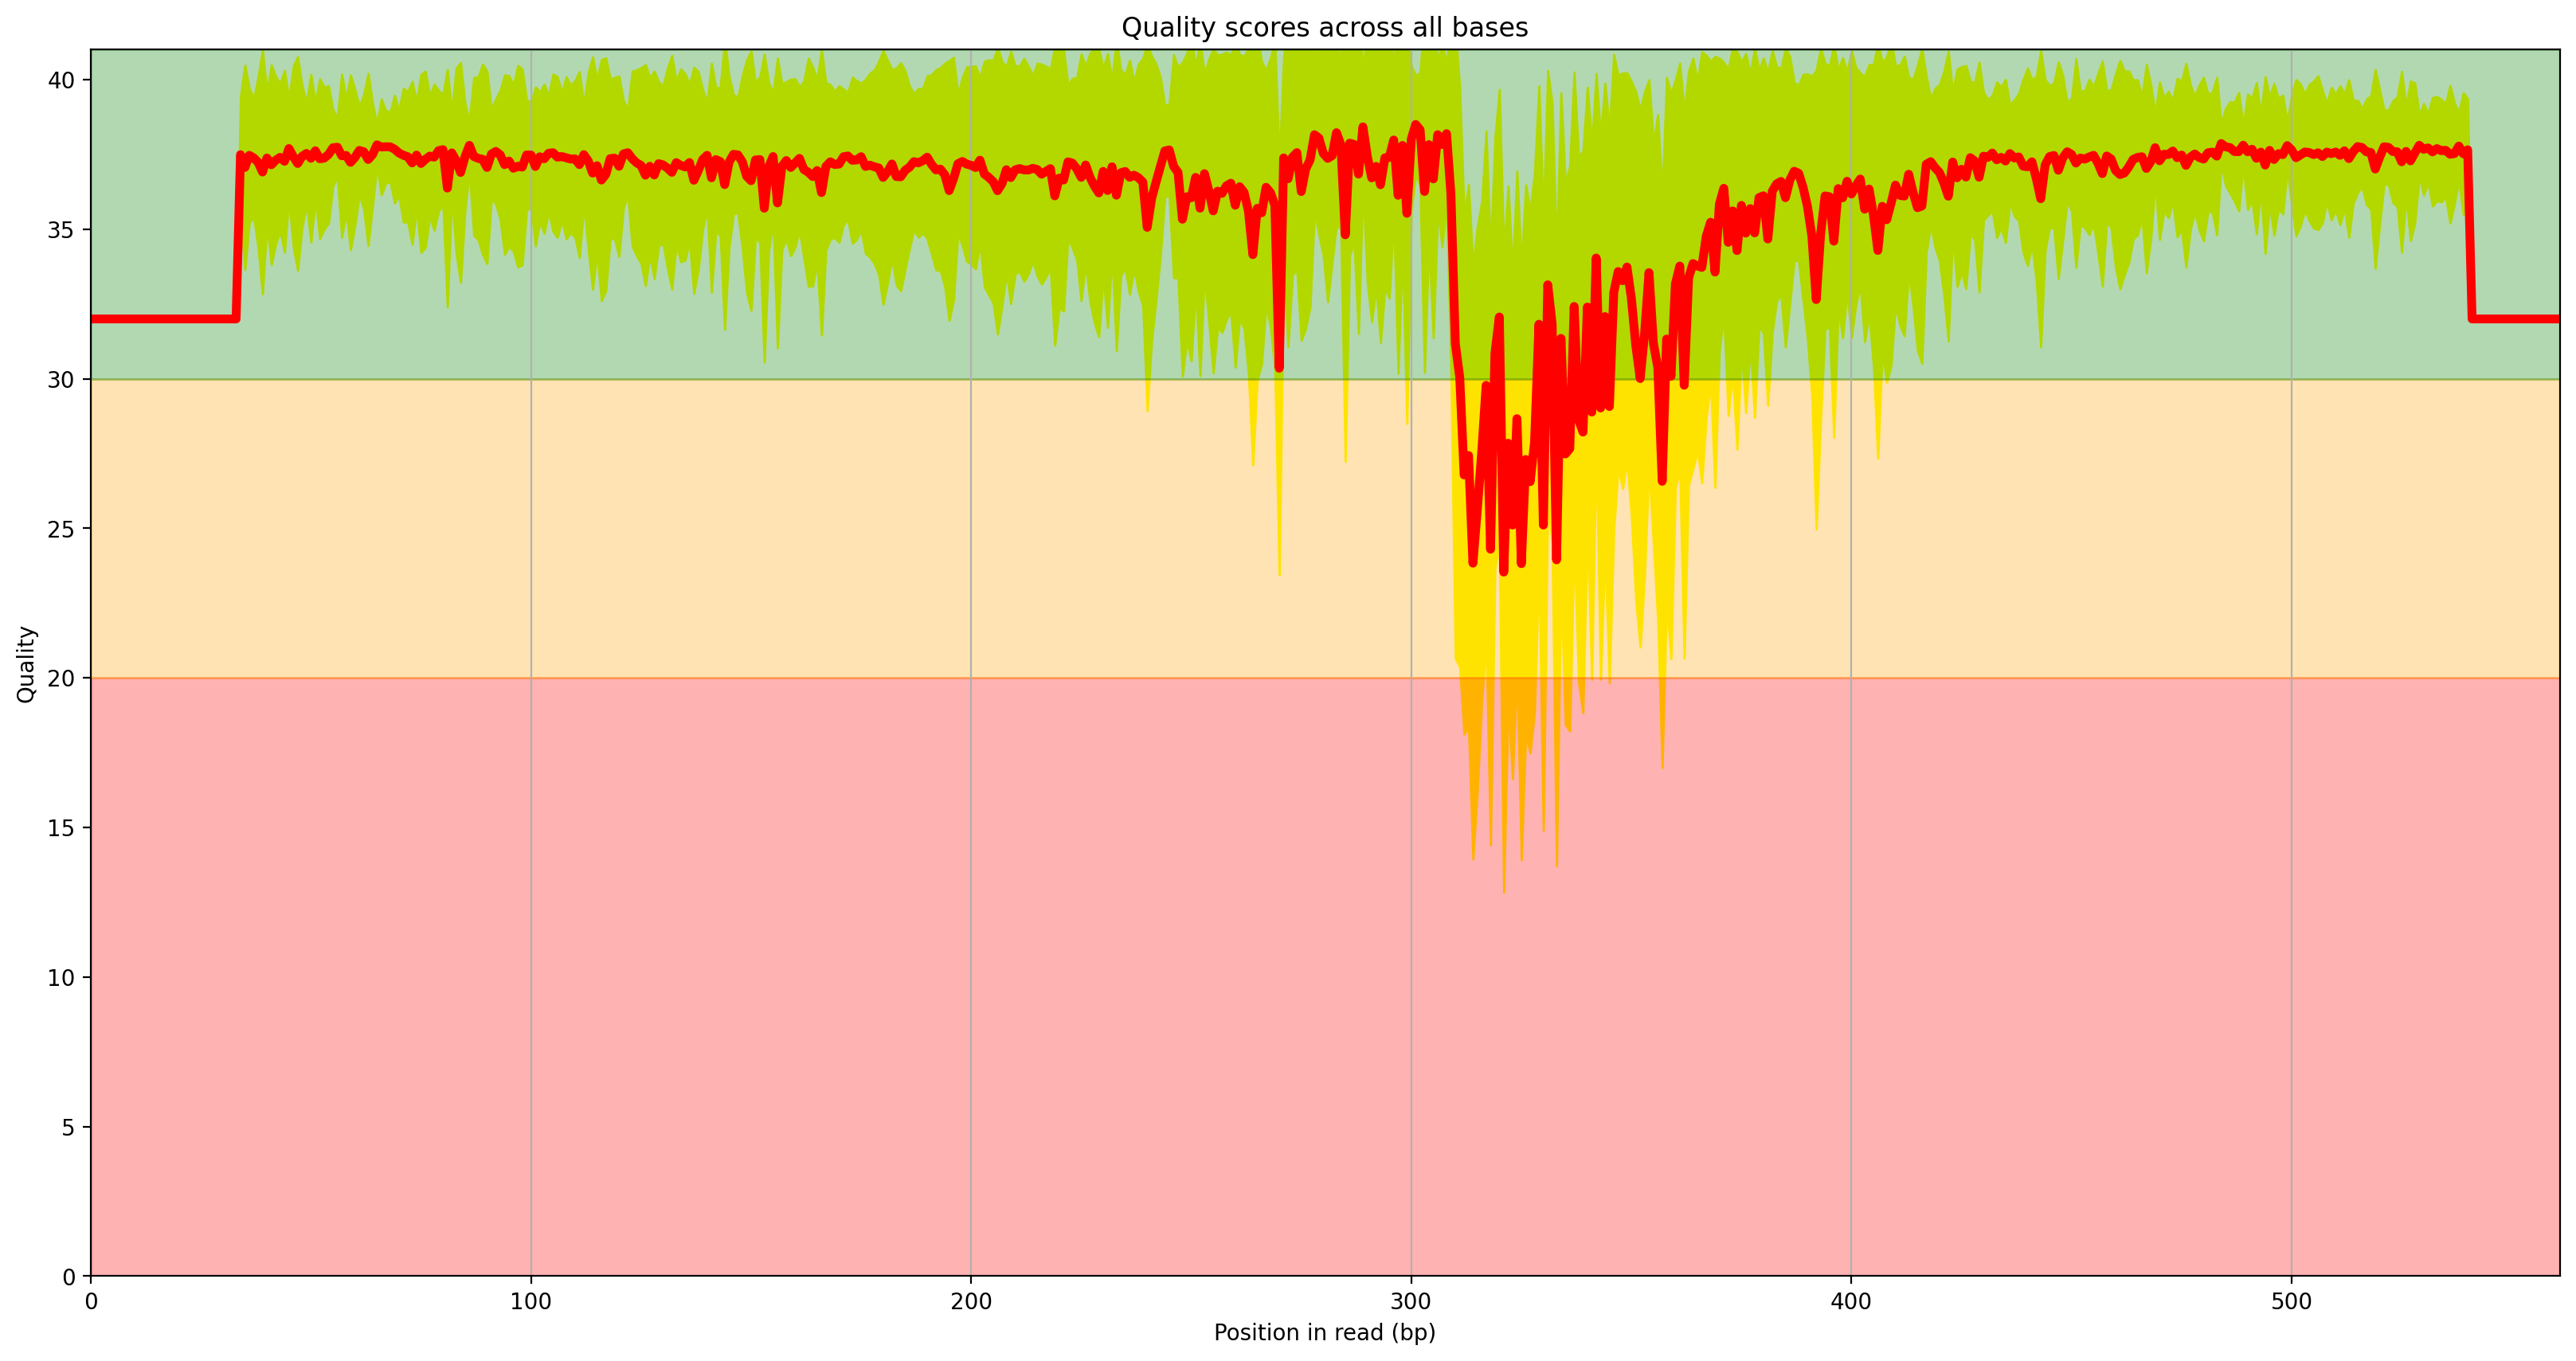

In [44]:
# Quality analysis: FastQC in Python using Sequana-FastQC
from sequana import FastQC, PacbioSubreads

qc = FastQC(str(Path.joinpath(data_dir, fastq)))
plt.figure(figsize=(20, 10), dpi=200)
qc.boxplot_quality()
# if the plot is in the red area, the quality is low

In [ ]:
# collect sequences
seqs = []


In [ ]:
# sequence alignment (simple example)
s1 = seqs[0]
s2 = seqs[1]




In [ ]:
# translation and sequence alignment


In [ ]:
### FastQC

### 3. SAM/BAM

In [46]:
import pysam

# read SAM file
samfile = pysam.AlignmentFile(Path.joinpath(data_dir, sam))
header = samfile.header
print(header)

@HD	VN:1.0	SO:unsorted
@SQ	SN:Transkript	LN:3393
@PG	ID:bowtie2	PN:bowtie2	VN:2.3.4	CL:"C:\Users\p41824\Desktop\CML_GUI\New\Tools\bowtie2-2.3.4-mingw-x86_64\bowtie2-align-s.exe --wrapper basic-0 -x C:\Users\p41824\Desktop\CML_GUI\New\ReferenceGenes\ABL_GENE -S C:\Users\p41824\Desktop\CML_GUI\New\Output\F359V1II_S50_2020Nov17_172435\F359V1II_S50_unclustered.sam -p 4 -U C:\Users\p41824\Desktop\CML_GUI\New\Output\F359V1II_S50_2020Nov17_172435\F359V1II_S50_merged.fastq"



In [48]:
# store SAM file in pandas dataframe
columns = ["QNAME", "FLAG", "RNAME", "POS", "MAPQ", "CIGAR", "RNEXT", "PNEXT", "TLEN", "SEQ", "QUAL", "AS: alignment score", "XN: number of ambiguous bases", "XM: number of mismatches", "XO: number of gap opens", "XG: number of gap extensions", "NM: edit distance", "MD: string representation of the mismatched reference bases", "YT: UU indicates the read was not part of a pair" ]
df_sam = pd.read_csv(Path().joinpath(data_dir, sam), names=columns, sep="\t", skiprows=3, header=None)
df_sam.columns = columns

In [ ]:
# the guy is using mail.ru i was very surprised, nothing more

In [54]:
# print SAM dataframe
df_sam[df_sam["CIGAR"] != "507M"] # 507 nucleotides match

,QNAME,FLAG,RNAME,POS,MAPQ,CIGAR,RNEXT,PNEXT,TLEN,SEQ,QUAL,AS: alignment score,XN: number of ambiguous bases,XM: number of mismatches,XO: number of gap opens,XG: number of gap extensions,NM: edit distance,MD: string representation of the mismatched reference bases,YT: UU indicates the read was not part of a pair
140,M01351:113:000000000-C9W4M:1:1104:16075:1151_A...,0,Transkript,717,42,237M1D269M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGG...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,AS:i:-8,XN:i:0,XM:i:0,XO:i:1,XG:i:1,NM:i:1,MD:Z:237^G269,YT:Z:UU
199,M01351:113:000000000-C9W4M:1:1105:11376:2011_G...,0,Transkript,717,42,467M1D39M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGG...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,AS:i:-38,XN:i:0,XM:i:10,XO:i:1,XG:i:1,NM:i:11,MD:Z:142G124G9C2C3A6C15T30A110C6C10^C39,YT:Z:UU
329,M01351:113:000000000-C9W4M:1:1108:18380:1492_C...,0,Transkript,717,42,217M2D288M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGG...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,AS:i:-11,XN:i:0,XM:i:0,XO:i:1,XG:i:2,NM:i:2,MD:Z:217^TA288,YT:Z:UU
354,M01351:113:000000000-C9W4M:1:1108:19563:508_AC...,0,Transkript,717,42,282M1D224M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGG...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,AS:i:-8,XN:i:0,XM:i:0,XO:i:1,XG:i:1,NM:i:1,MD:Z:282^G224,YT:Z:UU
446,M01351:113:000000000-C9W4M:1:1110:19009:1804_G...,0,Transkript,717,42,43M1D463M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGG...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,AS:i:-16,XN:i:0,XM:i:3,XO:i:1,XG:i:1,NM:i:4,MD:Z:43^G240A14T41A165,YT:Z:UU
571,M01351:113:000000000-C9W4M:1:1114:15589:1082_G...,0,Transkript,717,42,31M1D475M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGCCAGTACGGGG...,GGFFEEGGF9@FCFFAFFFGGGG8@FCFGGFGCGGGEGFFFC:C>F...,AS:i:-21,XN:i:0,XM:i:5,XO:i:1,XG:i:1,NM:i:6,MD:Z:31^G111C27T49T85T7C191,YT:Z:UU
615,M01351:113:000000000-C9W4M:1:1115:27531:1335_G...,0,Transkript,717,42,31M1D475M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGCCAGTACGGGG...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGCFFGGGGGGGG...,AS:i:-18,XN:i:0,XM:i:4,XO:i:1,XG:i:1,NM:i:5,MD:Z:31^G249A2A6C102G112,YT:Z:UU
669,M01351:113:000000000-C9W4M:1:1116:28603:859_GG...,0,Transkript,717,42,136M1D370M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGG...,GGGGGEGGFFGGGGGGFGGGGGGGFGGGGGGGGGGGGGGGGGFGGG...,AS:i:-22,XN:i:0,XM:i:6,XO:i:1,XG:i:1,NM:i:7,MD:Z:136^A144A2A11T5T38A2T162,YT:Z:UU
753,M01351:113:000000000-C9W4M:1:1117:10082:1340_G...,0,Transkript,717,42,208M1D298M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCCAGTACGGG...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGDGGGGGGGGGGGGGGGGG...,AS:i:-8,XN:i:0,XM:i:0,XO:i:1,XG:i:1,NM:i:1,MD:Z:208^C298,YT:Z:UU
872,M01351:113:000000000-C9W4M:1:2102:5728:1810_TC...,0,Transkript,717,23,37M4D13M14I453M,*,0,0,CACGGACATCACCATGAAGCACAAGCTGGGCGGGGGCTCGGAGATG...,GGGGGGGGGGGGGGGGGGGG<FGGGGGFGGGGGGGGGGGGDGGGGG...,AS:i:-130,XN:i:0,XM:i:20,XO:i:2,XG:i:18,NM:i:38,MD:Z:37^CAGT0A3G2G7A3C87G116A11C7G8C3G0T5T17T1...,YT:Z:UU


In [55]:
# File conversion: SAM to BAM
with pysam.AlignmentFile(Path.joinpath(data_dir, sam), "r") as samfile:
    with pysam.AlignmentFile(Path.joinpath(data_dir, "output.bam"), "wb", header=samfile.header) as bamfile:
        for read in samfile:
            bamfile.write(read)
             


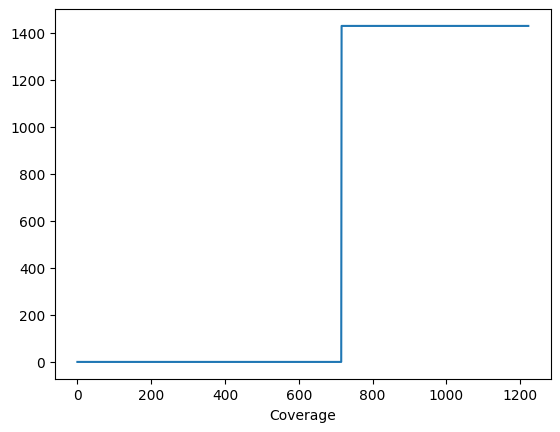

In [59]:
from sequana import BAM

# plot BAM information
bam_file = Path.joinpath(data_dir, "output.bam")
bam = BAM(bam_file)
bam.plot_coverage()

In [ ]:
# Point Mutation Analysis with Position Weight Matrix
from collections import Counter


In [ ]:
# add colnames to pwm


In [ ]:
### IGV: Integrative Genomics Viewer

### 4. VCF

In [ ]:
# using vcfpy
import vcf

# read VCF file


In [ ]:
# collect records


In [ ]:
for record in records:
  print("Record:\t" + str(record))
  print("Chromosome:\t" + record.CHROM)
  print("Reference Sequence:\t" + str(record.POS))
  print("Reference Sequence:\t" + record.REF)
  print("Deletion?\t" + str(record.is_deletion))
  print("InDel?\t" + str(record.is_indel))
  print("Is SNP?\t" + str(record.is_snp))
  print("Alternate allele frequency:\t" + str(record.aaf))

  break


In [ ]:
# using pysam
v2 = pysam.VariantFile(data_dir + vcf_file)

# collect records
records2 = []
for i in v2.fetch():
  records2.append(i)

In [ ]:
for record in records2:
  print("Record:\t" + str(record))
  print("Chromosome:\t" + record.crom)
  print("Reference Sequence:\t" + str(record.pos))
  break

In [ ]:
# collect alternate allele frequencies


In [ ]:
# plot aafs


In [ ]:
### Galaxy Tools

### 5. PDB

In [ ]:
from Bio import PDB

In [ ]:
# download PDB files


In [ ]:
# parse PDB files


Meta information about PDB files

In [ ]:
# 4HHB


In [ ]:
# 1MBN
[print(x + str(":\t") + str(pdb2.header[x])) for x in pdb2.header]

In [ ]:
# 1EMY
[print(x + str(":\t") + str(pdb3.header[x])) for x in pdb3.header]

In [ ]:
# Structures
pdbs = {"4HHB" : pdb1,
        "1MBN" : pdb2,
        "1EMY" : pdb2}
for key in pdbs.keys():
  for structure in pdbs[key]:
    for chain in structure:
      print(key + ":\tChain " + str(chain.id) + "\tNumber of residues: " + str(len(list(chain.get_residues()))) + "\tNumber of Atoms: " + str(len(list(chain.get_atoms()))) )
    print()


In [ ]:
# Residues
for i, res in enumerate(pdbs["4HHB"][0]["A"].get_residues()):
  print(pdbs["4HHB"][0]["A"][i+1])
  for atom in res:
    print(atom, atom.serial_number, atom.element)

  if i > 3:
    break


In [ ]:
# FASTA Sequence
# a)
d3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
 'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N',
 'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
 'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

for key in pdbs.keys():
  for structure in pdbs[key]:
    for chain in structure:
      seq = ""
      for res in chain.get_residues():
        if res.get_resname() in d3to1.keys():
          seq += d3to1[res.get_resname()]
      print(key + ":\tChain " + str(chain.id) + " " + seq)
    print()


In [ ]:
### pymol